In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import table_nan_val as tnv
import execdata as data
import itertools

In [2]:
df = pd.read_csv("test_data.csv")
df

,ID,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Has_a_mobile_phone,Has-a_work_phone,Has_a_phone,Has_an_email,Job_title,Family_member_count,Account_age,Is_high_risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1,-6,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2,-16,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2,-52,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2,-54,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2,-48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2,-22,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2,-42,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1,-25,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2,-49,0


In [3]:
df.shape

(7292, 20)

In [4]:
df.columns.values

array(['ID', 'Gender', 'Has_a_car', 'Has_a_property', 'Children_count',
       'Income', 'Employment_status', 'Education_level', 'Marital_status',
       'Dwelling', 'Age', 'Employment_length', 'Has_a_mobile_phone',
       'Has-a_work_phone', 'Has_a_phone', 'Has_an_email', 'Job_title',
       'Family_member_count', 'Account_age', 'Is_high_risk'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has_a_car            7292 non-null   object 
 3   Has_a_property       7292 non-null   object 
 4   Children_count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment_status    7292 non-null   object 
 7   Education_level      7292 non-null   object 
 8   Marital_status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment_length    7292 non-null   int64  
 12  Has_a_mobile_phone   7292 non-null   int64  
 13  Has-a_work_phone     7292 non-null   int64  
 14  Has_a_phone          7292 non-null   int64  
 15  Has_an_email         7292 non-null   i

In [6]:
df.describe()

,ID,Children_count,Income,Age,Employment_length,Has_a_mobile_phone,Has-a_work_phone,Has_a_phone,Has_an_email,Family_member_count,Account_age,Is_high_risk
count,7.292000e+03,7292.000000,7.292000e+03,7292.000000,7292.000000,7292.0,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000
mean,5.078209e+06,0.428415,1.858672e+05,-15957.958722,59283.630691,1.0,0.230389,0.294158,0.087493,2.202139,-26.270022,0.016045
std,4.208243e+04,0.744350,1.032964e+05,4190.990010,137642.577749,0.0,0.421111,0.455695,0.282576,0.909726,16.563032,0.125657
min,5.008809e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.041912e+06,0.000000,1.170000e+05,-19382.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.069416e+06,0.000000,1.575000e+05,-15522.000000,-1534.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115503e+06,1.000000,2.250000e+05,-12454.000000,-397.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,14.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


Your selected dataframe has 20 columns.
There are 1 columns that have missing values.


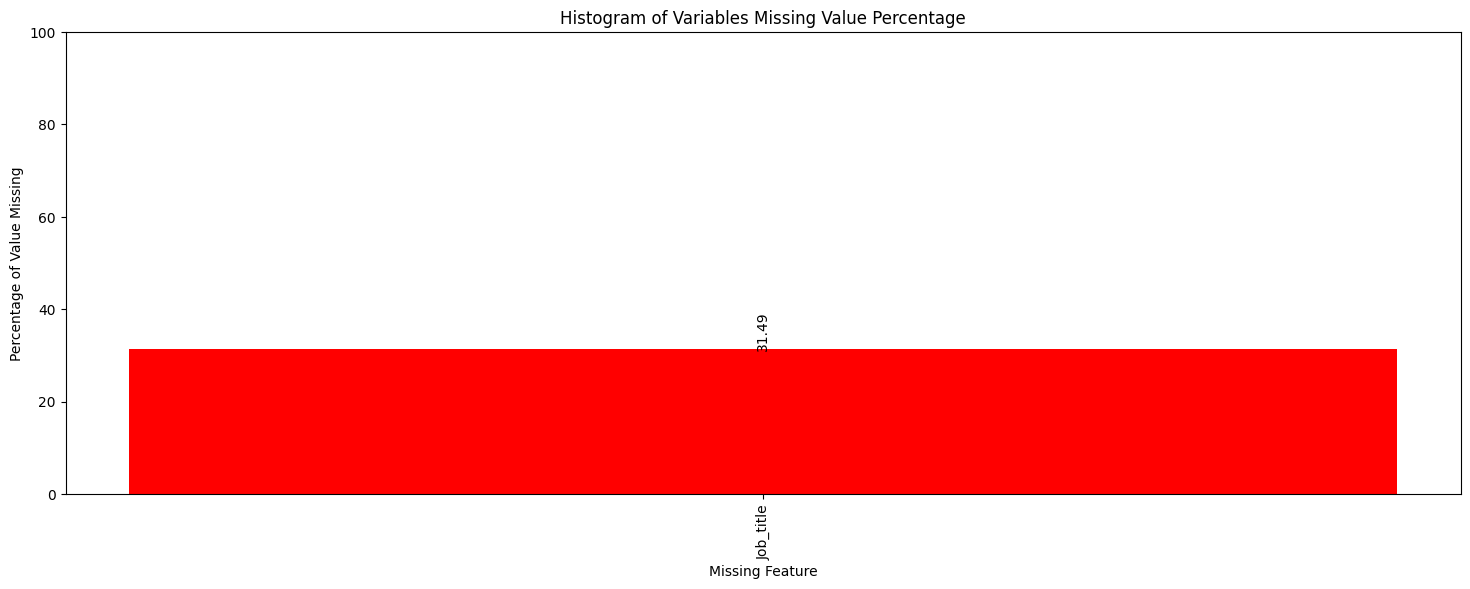

,index,Miss_Values,Miss_Rate,Available_Value
0,Job_title,2296,31.49,4996


In [7]:
tnv.Missing_Value_Analysis(df)

In [8]:
print(f'Duplicates in applications df: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')

Duplicates in applications df: 182, (2.5%)


In [9]:
df.nunique()

ID                     7292
Gender                    2
Has_a_car                 2
Has_a_property            2
Children_count            7
Income                  190
Employment_status         5
Education_level           5
Marital_status            5
Dwelling                  6
Age                    3988
Employment_length      2429
Has_a_mobile_phone        1
Has-a_work_phone          2
Has_a_phone               2
Has_an_email              2
Job_title                18
Family_member_count       8
Account_age              61
Is_high_risk              2
dtype: int64

In [10]:
df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df.shape

(7110, 20)

In [11]:
df['Job_title'].fillna(value='Other', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7110 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7110 non-null   int64  
 1   Gender               7110 non-null   object 
 2   Has_a_car            7110 non-null   object 
 3   Has_a_property       7110 non-null   object 
 4   Children_count       7110 non-null   int64  
 5   Income               7110 non-null   float64
 6   Employment_status    7110 non-null   object 
 7   Education_level      7110 non-null   object 
 8   Marital_status       7110 non-null   object 
 9   Dwelling             7110 non-null   object 
 10  Age                  7110 non-null   int64  
 11  Employment_length    7110 non-null   int64  
 12  Has_a_mobile_phone   7110 non-null   int64  
 13  Has-a_work_phone     7110 non-null   int64  
 14  Has_a_phone          7110 non-null   int64  
 15  Has_an_email         7110 non-null   int64 

In [12]:
df.drop('Has_a_mobile_phone', axis=1, inplace=True)

In [13]:
df

,ID,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Has-a_work_phone,Has_a_phone,Has_an_email,Job_title,Family_member_count,Account_age,Is_high_risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,0,0,0,Medicine staff,1,-6,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,0,1,0,Managers,2,-16,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,0,0,1,Core staff,2,-52,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,0,0,0,Managers,2,-54,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,0,0,0,Laborers,2,-48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,5061507,F,N,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21464,365243,0,0,0,Other,2,-8,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,0,0,1,Drivers,2,-42,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,0,Other,1,-25,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,0,0,Laborers,2,-49,0


In [14]:
start_df=pd.DataFrame(df.groupby(['ID'])['Account_age'].agg(min)).reset_index()
start_df['Account_age']=-start_df['Account_age']

In [15]:
df['AGE_YEARS']=-df['Age']/365.2425
df.drop('Age', axis=1, inplace=True)

In [16]:
df['UNEMPLOYED']=0
df.loc[-df['Employment_length']<0,'UNEMPLOYED']=1

In [17]:
df['YEARS_EMPLOYED']=-df['Employment_length']/365.2425
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
df.drop('Employment_length', axis=1, inplace=True)

In [18]:
df["Gender"] =  df["Gender"].replace(['F','M'],[0,1])
df["Has_a_car"] = df["Has_a_car"].replace(["Y","N"],[1,0])
df["Has_a_property"] = df["Has_a_property"].replace(["Y","N"],[1,0])

In [19]:
df = df.rename(columns=
               {'Has_a_car': 'OwnCar',
                'Has_a_property':'OwnProperty',
                'Children_count':'NumOfChildren',
                'Employment_status':'IncomeType',
                'Education_level':'EducationLevel',
                'Marital_status':'FamilyStatus',
                'Has-a_work_phone':'WorkPhone',
                'Has_a_phone':'Phone',
                'Has_an_email':'Email',
                'Job_title':'OccupationType',
                'Family_member_count':'NumOfFamilyMember',
                'Is_high_risk':'Risk_TargetVariable',
                'Account_age':'AccountActivateLength',
                'AGE_YEARS':'Age',
                'UNEMPLOYED':'UnemployedStatus',
                'YEARS_EMPLOYED':'YearsOfEmployed'})

In [20]:
df['NumOfFamilyMember']=df['NumOfFamilyMember'].astype(int)

In [21]:
df=df[['ID',
       'Gender',
       'Age',
       'UnemployedStatus',
       'YearsOfEmployed',  
       'OccupationType',
       'IncomeType',
       'Income',
       'EducationLevel',
       'Dwelling',
       'OwnCar',
       'OwnProperty', 
       'FamilyStatus',
       'NumOfChildren',
       'NumOfFamilyMember', 
       'AccountActivateLength',
       'WorkPhone',
       'Phone',
       'Email',
       'Risk_TargetVariable']]
     

In [22]:
df.to_csv('processed_dataset_test.csv',index=False)

In [23]:
df.columns

Index(['ID', 'Gender', 'Age', 'UnemployedStatus', 'YearsOfEmployed',
       'OccupationType', 'IncomeType', 'Income', 'EducationLevel', 'Dwelling',
       'OwnCar', 'OwnProperty', 'FamilyStatus', 'NumOfChildren',
       'NumOfFamilyMember', 'AccountActivateLength', 'WorkPhone', 'Phone',
       'Email', 'Risk_TargetVariable'],
      dtype='object')

In [24]:
df = data.encode(df)
df

,ID,Gender,Age,UnemployedStatus,YearsOfEmployed,OccupationType,IncomeType,Income,EducationLevel,Dwelling,OwnCar,OwnProperty,FamilyStatus,NumOfChildren,NumOfFamilyMember,AccountActivateLength,WorkPhone,Phone,Email,Risk_TargetVariable
0,5091261,0,46.089927,0,4.632539,11,2,202500.0,4,1,0,1,2,0,1,-6,0,0,0,0
1,5096963,1,49.627302,0,2.595536,10,0,675000.0,1,1,1,0,1,0,2,-16,0,1,0,0
2,5087880,0,60.143603,0,14.278185,3,2,234000.0,1,1,0,0,0,0,2,-52,0,0,1,0
3,5021949,0,34.160866,0,1.248486,10,0,445500.0,1,1,1,1,1,0,2,-54,0,0,0,0
4,5105705,0,33.279260,0,1.826184,8,4,225000.0,4,2,1,0,1,0,2,-48,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,5061507,0,58.766436,1,0.000000,12,1,202500.0,4,1,0,1,1,0,2,-8,0,0,0,0
7288,5068826,0,41.002895,0,9.719570,4,4,157500.0,1,1,1,1,1,0,2,-42,0,0,1,0
7289,5026088,0,56.077811,0,13.771672,12,4,67500.0,4,1,0,1,4,0,1,-25,1,1,0,0
7290,5142701,0,51.831318,0,18.283743,8,0,95850.0,4,1,1,0,1,0,2,-49,1,0,0,0


In [25]:
X_train, X_test, y_train, y_test = data.split(df)

In [26]:
train_score, test_score, models = data.model_evaluate(X_train, X_test, y_train, y_test)

model list is ['LogisticRegression', 'KNeighbors', 'SVC', 'DecisionTree', 'RandomForest']
for model LogisticRegression with the train_score:0.9832981715893109 and test_score:0.9845288326300985 
for model KNeighbors with the train_score:0.9834739803094233 and test_score:0.9838255977496484 
for model SVC with the train_score:0.9832981715893109 and test_score:0.9845288326300985 
for model DecisionTree with the train_score:0.9998241912798875 and test_score:0.9718706047819972 
for model RandomForest with the train_score:0.9998241912798875 and test_score:0.9838255977496484 


In [27]:
train_score

[0.9832981715893109,
 0.9834739803094233,
 0.9832981715893109,
 0.9998241912798875,
 0.9998241912798875]

In [28]:
test_score

[0.9845288326300985,
 0.9838255977496484,
 0.9845288326300985,
 0.9718706047819972,
 0.9838255977496484]